### Problem Definition: Alphabet Recognition

#### Dataset: https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Updating width of Jupyter notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_colwidth', 2000)
pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 4000

img_data = pd.read_csv('A_Z Handwritten Data.csv')
img_data.head(2)

In [2]:
from emnist import extract_training_samples, extract_test_samples

X_train, y_train = extract_training_samples('letters')
X_test, y_test = extract_test_samples('letters')

In [3]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   3   4   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  20 109 114  45   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 114 245 253 214   5   0   0   0   0   0  20 100  33   1   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 125 249 254 233  22   0   0   0   0  10 123 238 163  33   0
    0   0   0   2   4   4   0   0   0   0]
 [  0   0   0  82 233 254 251  82   2   0   0   3  79 220 254 244 126   0
    0   0   3  77 125 113   8   0   0   0]
 [  0   0   0  37 217 254 254 128   5   0   0  34 204 254 255 254 216   5
    0  22 154 247 254 253 111   3   0   0]
 [  0   0   0  37 217 254 254 160  16   0   3  84 233 254 255 254 233  22
   10  95 232 254 254 246  77   2   0   0]
 [  0   0   0  39 217 254 254 184  25   0  34 175 251 254 255 25

In [4]:
print(y_train[0])

23


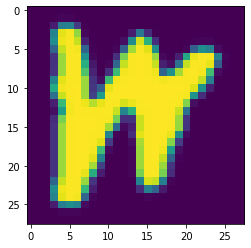

In [5]:
plt.imshow(X_train[0].reshape(28,28)) 

In [6]:
#print(y_train[4])

In [7]:
#plt.imshow(X_train[4].reshape(28,28)) 

In [8]:
X_train.shape

(124800, 28, 28)

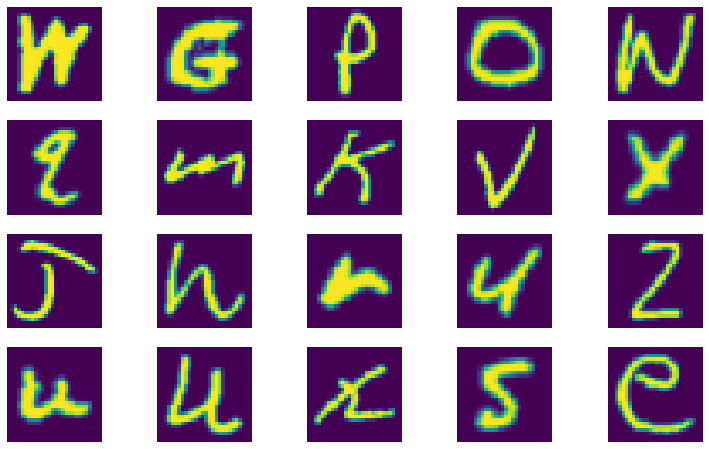

In [9]:
fig = plt.figure(figsize = (13,8))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i].reshape(28,28)) 
    plt.axis('off')



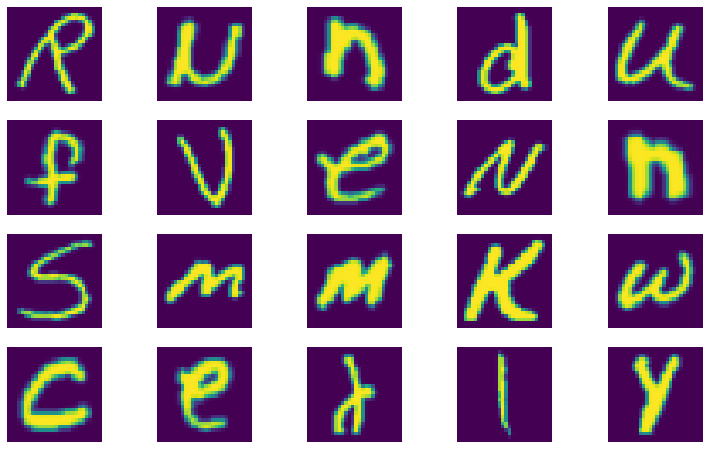

In [10]:
import random

fig = plt.figure(figsize = (13,8))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i + random.randint(1, X_train.shape[0])].reshape(28,28)) 
    plt.axis('off')

# HYPER PARAMETER TUNING

1. USE EARLY STOPPING TO DETERMINE IDEA NUMBER OF EPOCHS.
2. DropOut Rate
3. Take real time image as an input n predict. Display actual image first then show what is predicted.
4. save model

In [11]:
print(y_train)

[23  7 16 ... 13 15 19]


In [12]:
np.unique(y_train, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=uint8),
 array([4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800,
        4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800,
        4800, 4800, 4800, 4800], dtype=int64))

In [13]:
## Plotting number of image count per letter

# import string

# #visualize number of  character classes 
# plt.figure(figsize=(15,9))

# # Create a list of the alphabet characters
# alphabet = list(string.ascii_uppercase)

# sns.set(style='whitegrid')
# g = sns.countplot(y_train, palette="icefire")
# plt.title("Distribution of Labels in Classes")


# # Set the tick labels to the alphabet characters
# plt.xticks(range(26),alphabet)
# plt.xlabel(None)


## Importing Tensorflow and related libraries for image processing

In [14]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [15]:
from tensorflow.keras.utils import to_categorical

## Normalize the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

## To categorise with to_categorical index must start with 0
y_train = y_train - 1
y_test = y_test - 1

y_train = to_categorical(y_train,26) # 26 output classes
y_test = to_categorical(y_test,26)

## Reshaping to data to add gray scale to the data
# X_train = np.expand_dims(X_train, axis = -1)
# X_test = np.expand_dims(X_test, axis = -1)

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

## Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state = 51 )

## Data Augmentation
datagen = ImageDataGenerator(
    zoom_range = 0.1,
    shear_range = 0.1,
    rotation_range=20,
    horizontal_flip=True)

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [17]:
X_train.shape

(99840, 28, 28, 1)

## Building the CNN

In [18]:
cnn = tf.keras.models.Sequential()

In [19]:
## adding 1st convolution layer
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=3, strides =1, activation = 'relu', input_shape = (28,28,1)))
## adding 1st pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 1))

## adding second layer of convolution layer
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=3, strides =1, activation = 'relu'))
## adding second layer of pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 1))

## flatting input
cnn.add(tf.keras.layers.Flatten())

## Full Connection
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

## Output layer
cnn.add(tf.keras.layers.Dense(units = 26, activation = 'softmax'))


## Compiling the CNN

## Try using sparse cross entropy

In [20]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
## Early stopping to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
history = cnn.fit(datagen.flow(X_train, y_train, batch_size = 32), epochs = 25 , validation_data = (X_val, y_val))

Epoch 1/25
3120/3120 [==============================] - 103s 33ms/step - loss: 0.4039 - accuracy: 0.8656 - val_loss: 0.3519 - val_accuracy: 0.8808
Epoch 2/25
3120/3120 [==============================] - 103s 33ms/step - loss: 0.3666 - accuracy: 0.8775 - val_loss: 0.3416 - val_accuracy: 0.8872
Epoch 3/25
3120/3120 [==============================] - 104s 33ms/step - loss: 0.3463 - accuracy: 0.8842 - val_loss: 0.3357 - val_accuracy: 0.8873
Epoch 4/25
3120/3120 [==============================] - 105s 34ms/step - loss: 0.3253 - accuracy: 0.8906 - val_loss: 0.3098 - val_accuracy: 0.8939
Epoch 5/25
3120/3120 [==============================] - 103s 33ms/step - loss: 0.3157 - accuracy: 0.8924 - val_loss: 0.3103 - val_accuracy: 0.8984
Epoch 6/25
3120/3120 [==============================] - 104s 33ms/step - loss: 0.3047 - accuracy: 0.8951 - val_loss: 0.2895 - val_accuracy: 0.9029
Epoch 7/25
3120/3120 [==============================] - 104s 33ms/step - loss: 0.2926 - accuracy: 0.8989 - val_loss: 0

In [ ]:
cnn.save('Alphabet_Recognizer.h5')

In [ ]:
from keras.models import load_model

loaded_model = load_model('Alphabet_Recognizer.h5')

In [ ]:
## Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)